In [1]:
import sys
sys.path.append('../')

from src.m4_generator import M4Generator
from src.m4_data_loader import M4DataLoader
from src.training_loss_functions import *
from src.m4_evaluation_loss_functions import *
from src.visualization import *
from src.evaluation import *
from src.m4_model import M4Model


import numpy as np
import keras
import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline

Using TensorFlow backend.


# Load Data

In [2]:
EPOCHS = 1
BATCH_SIZE = 50
LOOKBACK = 48
HORIZON = 48
HIDDEN_LAYER_SIZE = 80
FEATURES_NUMBER = 2
OUTPUT_SIZE = HORIZON*2
LOSS = smape

diffAugmentation = DiffAugmentation()
x_augmentations = [diffAugmentation]
y_augmentations = [diffAugmentation]

data_loader = M4DataLoader("../Dataset/Train/Hourly-train.csv", "../Dataset/Test/Hourly-test.csv", 
                           x_augmentations, 
                           y_augmentations,
                           LOOKBACK, HORIZON,  validation_ratio=0.05)

train_x, train_y = data_loader.get_training_data()
test_x, test_y = data_loader.get_test_data()
validate_x, validate_y = data_loader.get_validation_data()
print(train_y.shape)
training_data_generator = M4Generator(train_x, train_y, BATCH_SIZE, FEATURES_NUMBER)
test_data_generator = M4Generator(test_x, test_y, BATCH_SIZE, FEATURES_NUMBER)
validation_data_generator = M4Generator(validate_x, validate_y, BATCH_SIZE, FEATURES_NUMBER)

(6472, 96)


# Train The Model

In [26]:
model = M4Model(hidden_layer_size=HIDDEN_LAYER_SIZE, batch_size=BATCH_SIZE, lookback=LOOKBACK, 
        output_size=OUTPUT_SIZE, learning_rate=0.001, loss = LOSS, dropout_ratio = 0.3, 
        features_number = FEATURES_NUMBER)

model.train(training_data_generator, test_data_generator, epochs=EPOCHS)

hist = model.evaluate(validation_data_generator)
print(hist)

Epoch 1/1
8/8 [==============================] - 0s 17ms/step
82.61423349837838


# Save The Model

In [13]:
MODEL_BASE_DIR = '../models/test/1-LSTM'
model.save(MODEL_BASE_DIR)

Saved model files to disk under../models/test/1-LSTM/2


# Get Best And Worst Predictions

Loaded model from disk
Best Predection Error is    14.1059
Worst Predection Error is   140.4858


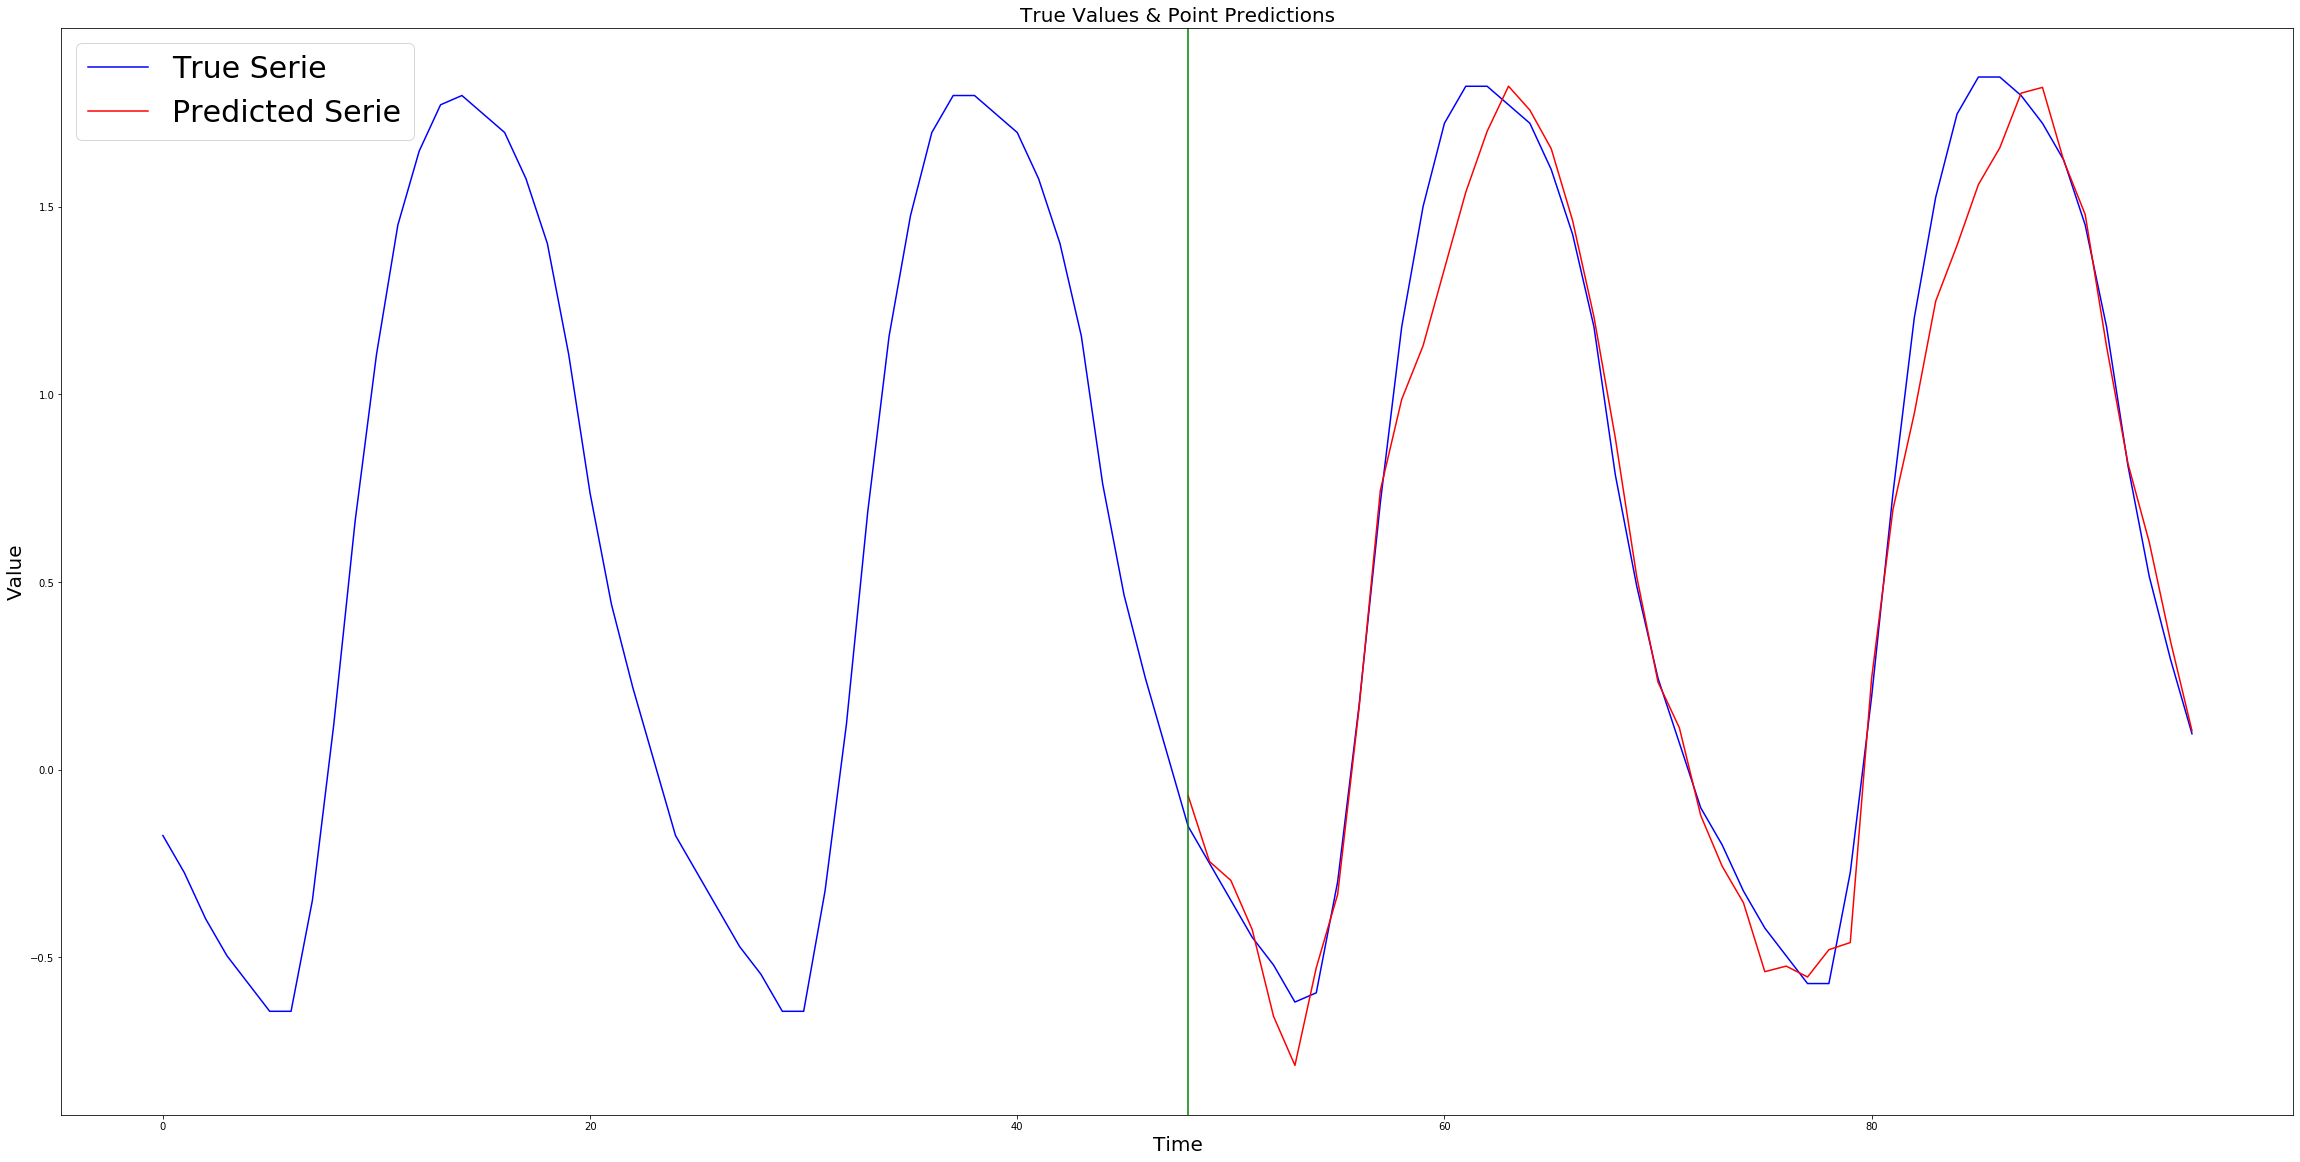

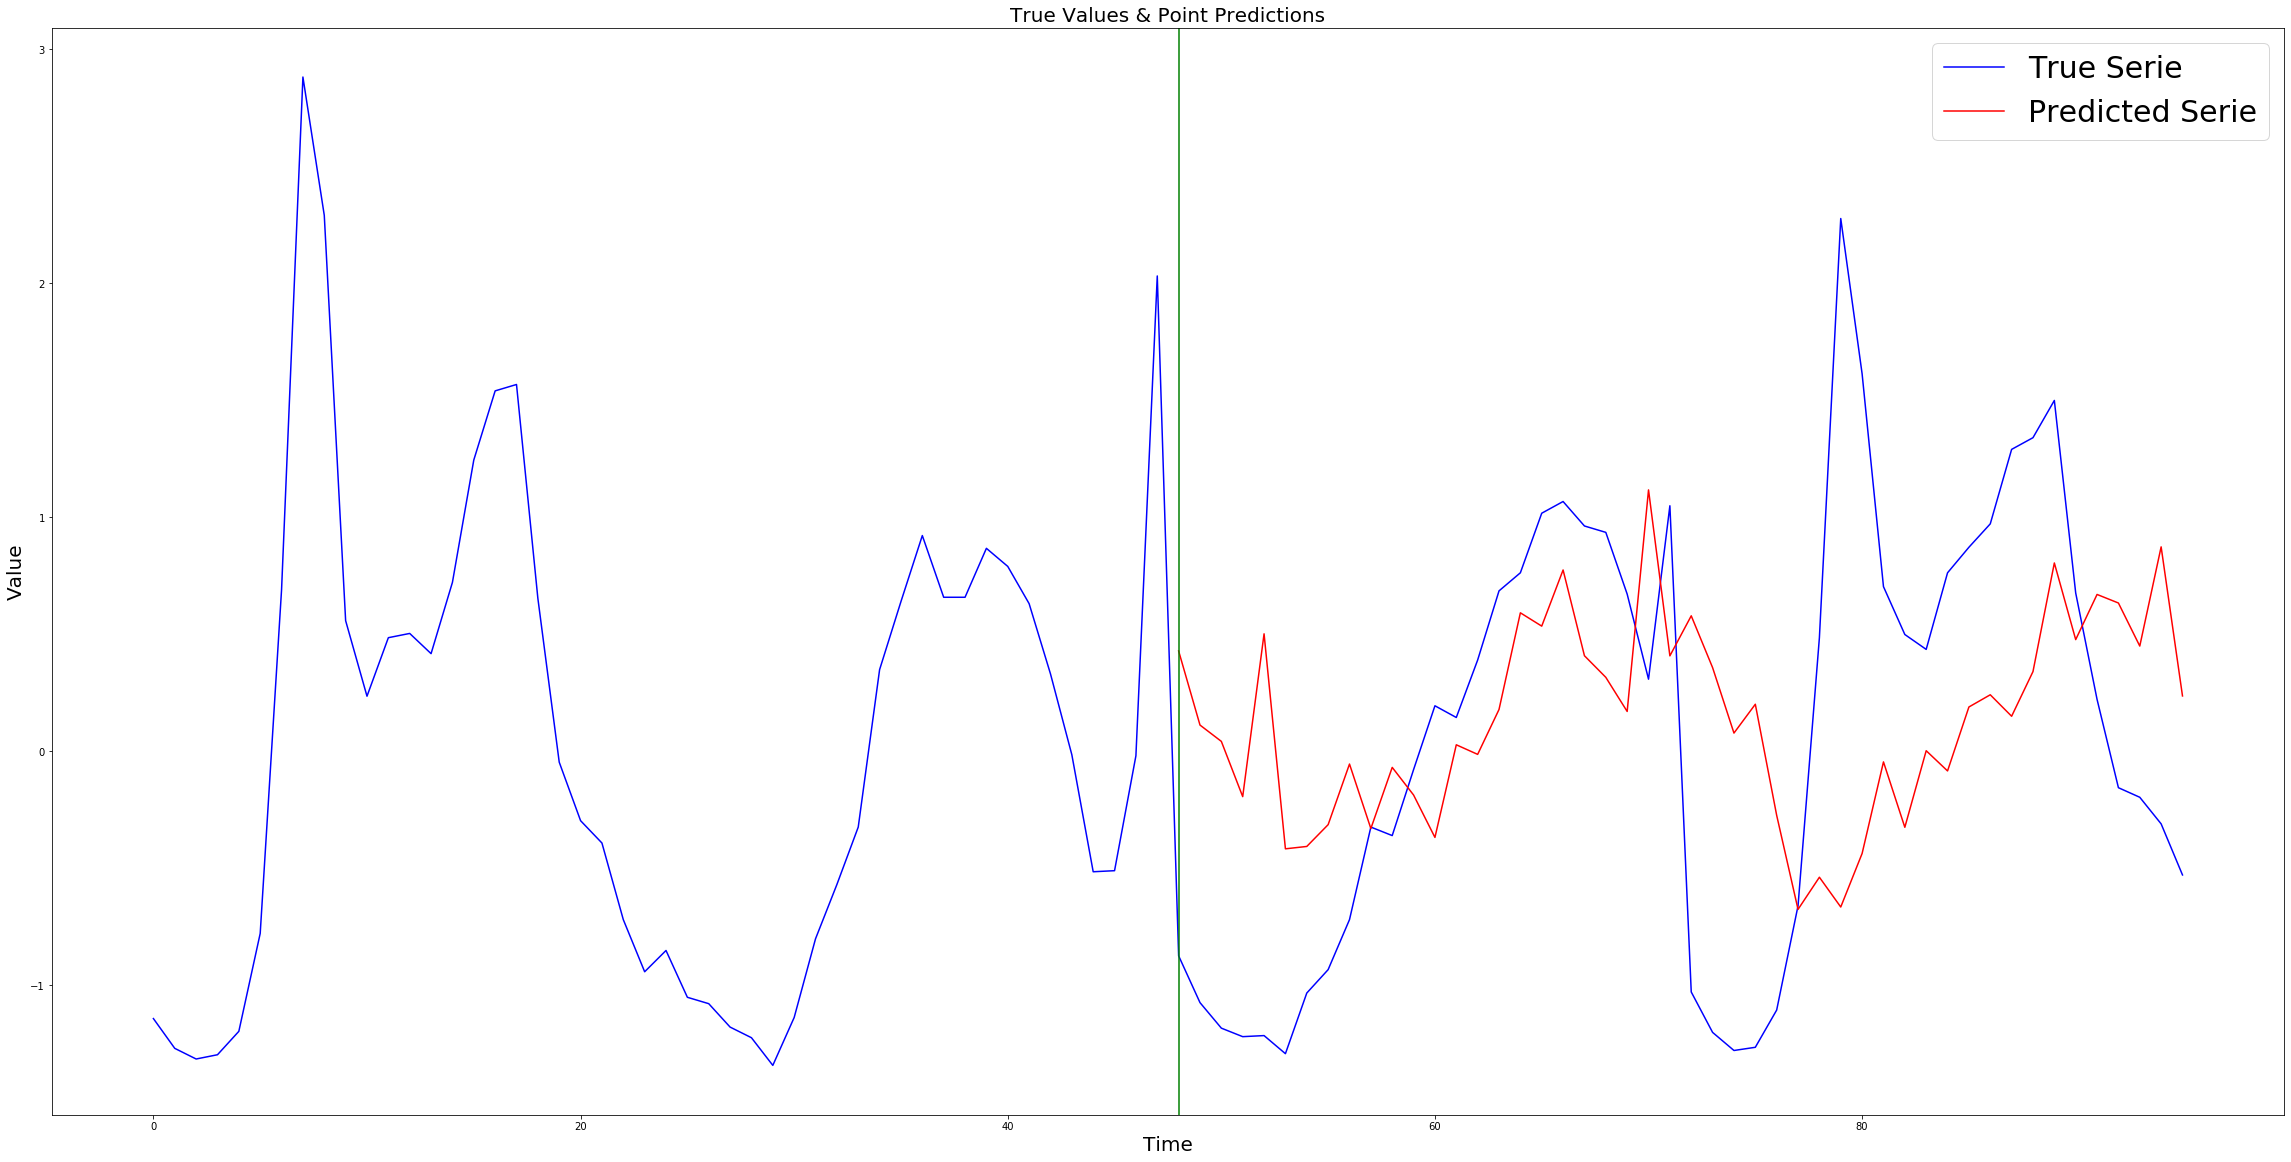

In [46]:

MODEL_BASE_DIR = '../models/test/1-LSTM/2'
model = M4Model()
hyperparameters = model.load(MODEL_BASE_DIR)
    
X, Y, Ypredictions, error =  sort_by_prediction_error(model,test_x, test_y, smape)

if FEATURES_NUMBER == 1:
    X = X[:,:, np.newaxis]

print(f'Best Predection Error is {error[0]:10.4f}')
print(f'Worst Predection Error is {error[X.shape[0]-1]:10.4f}')

plot_serie_and_prediction(X[:,:,0], Y[:,:HORIZON], Ypredictions[:,:HORIZON], serie_indx=0)
plot_serie_and_prediction(X[:,:,0], Y[:,:HORIZON], Ypredictions[:,:HORIZON], serie_indx=x.shape[0]-1)

# PLot Specific Serie From Test Set

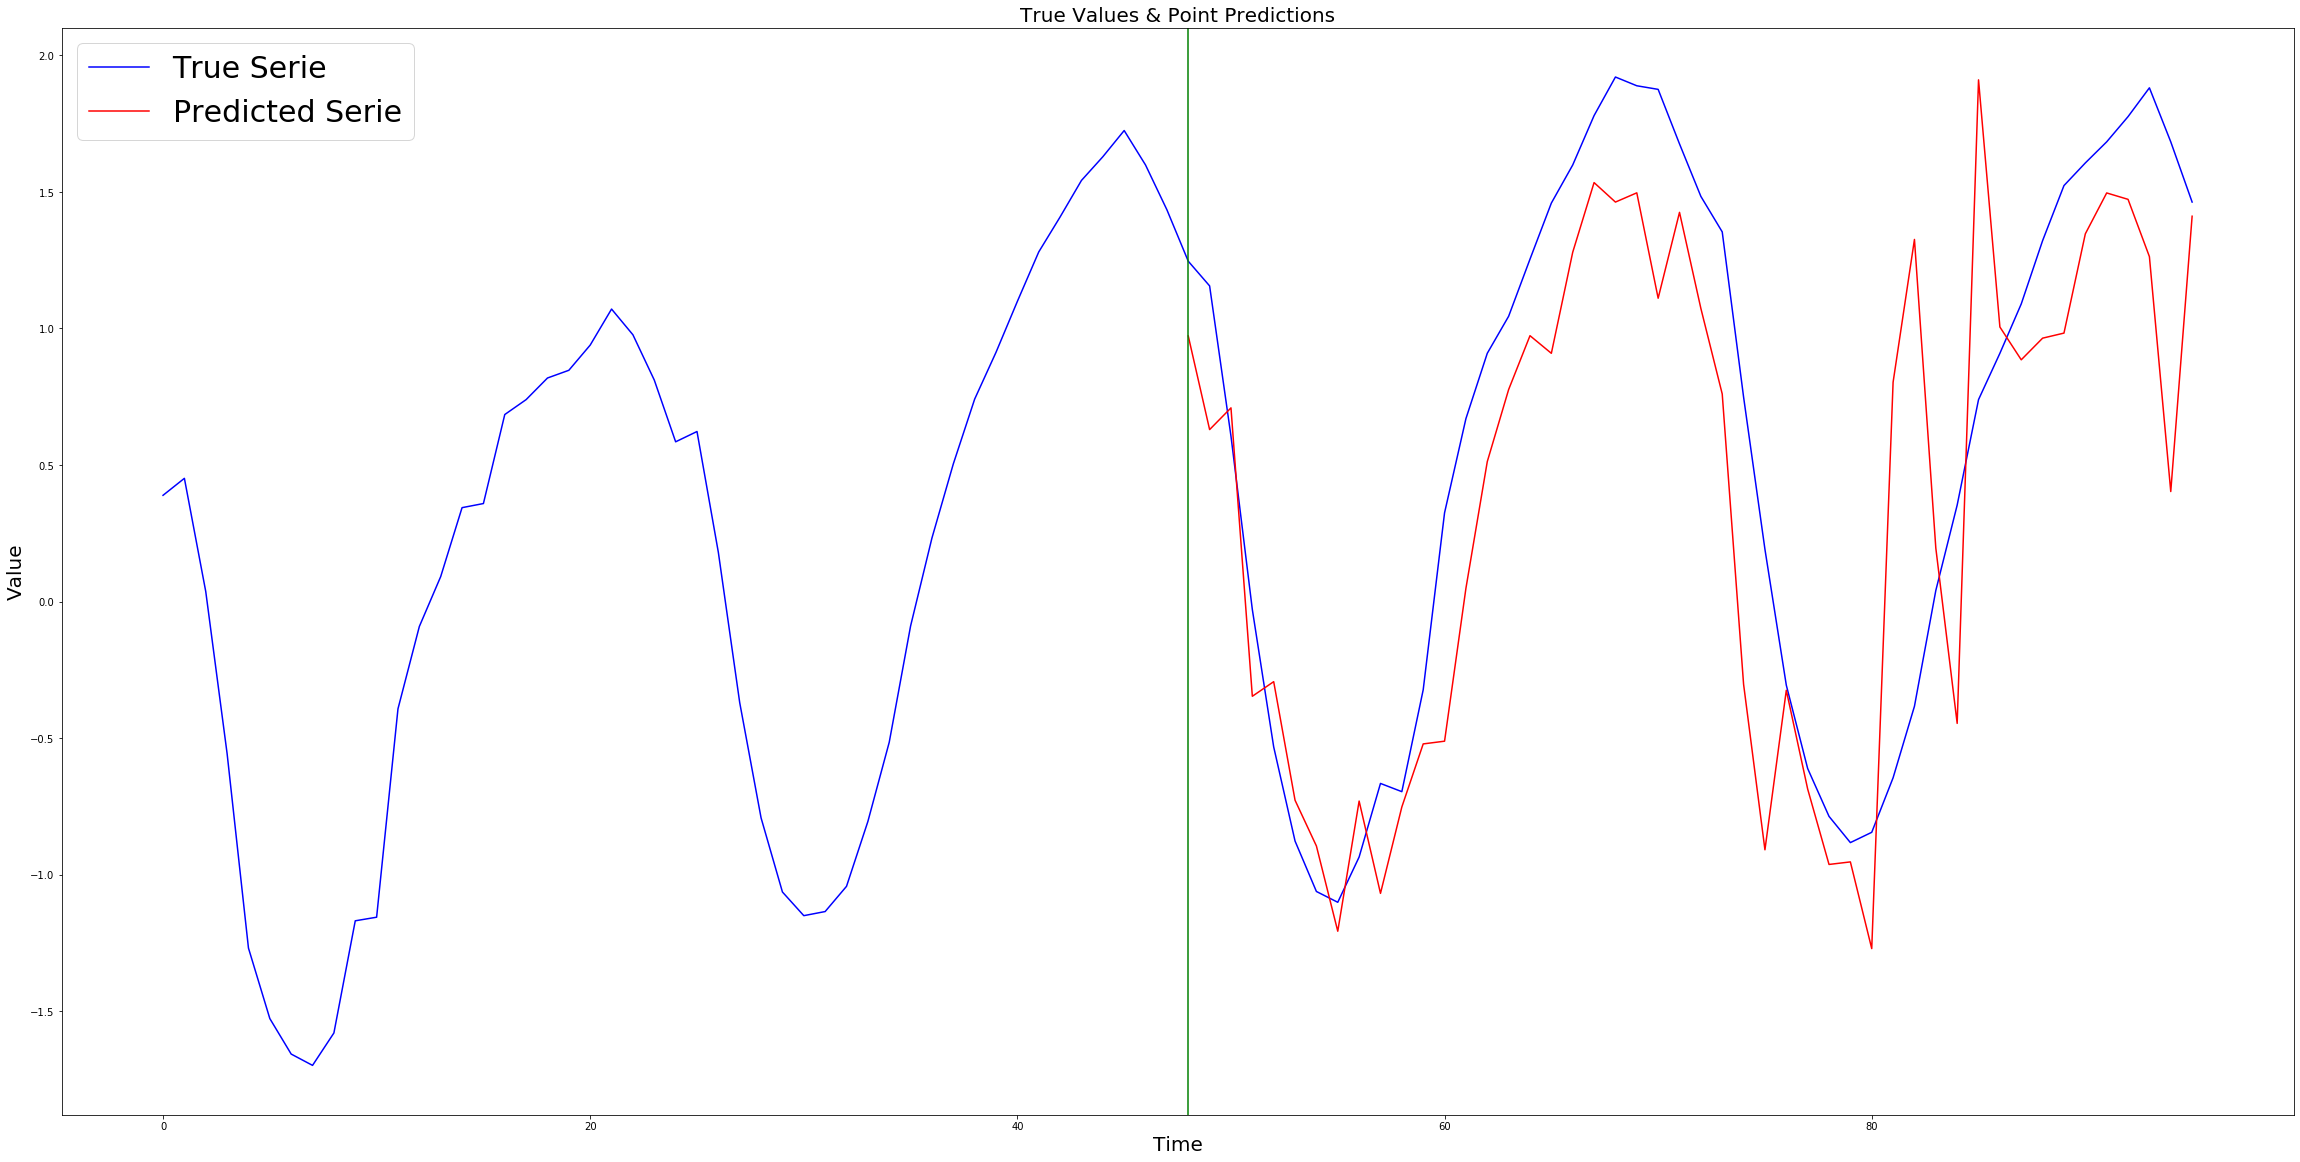

In [34]:
IDX = 40
X = test_x
Y = test_y
predictedY = model.predict(X)

if FEATURES_NUMBER == 1:
    X = X[:,:, np.newaxis]

#============ Predict Test
plot_serie_and_prediction(X[:,:,0], Y[:,:HORIZON], predictedY[:,:HORIZON], serie_indx=IDX)

# Evaluate A Model Against An Error Function

In [4]:
MODEL_NUMBER = 2
MODEL_BASE_DIR = '../models/point_predictions/1-LSTM'
evaluation_results = load_and_evaluate_model(f'{MODEL_BASE_DIR}/{MODEL_NUMBER}', '../Dataset/Train/Hourly-train.csv', 
                                             '../Dataset/Test/Hourly-test.csv', 
                                             x_augmentations, 
                                             y_augmentations, mase)

print(f'Hyperparameters : {evaluation_results["hyperparameters"]}')
print(f'Test Error For Model ({MODEL_NUMBER}) : {evaluation_results["test_error"]}')
print(f'Naive Test Error For Model ({MODEL_NUMBER}) : {evaluation_results["naive_test_error"]}')
print(f'SNaive Test Error For Model ({MODEL_NUMBER}) : {evaluation_results["snaive_test_error"]}')

print(f'Validation Error For Model ({MODEL_NUMBER}) : {evaluation_results["validation_error"]}')
print(f'Naive Validation Error For Model ({MODEL_NUMBER}) : {evaluation_results["naive_validation_error"]}')
print(f'SNaive Validation Error For Model ({MODEL_NUMBER}) : {evaluation_results["snaive_validation_error"]}')


SyntaxError: invalid syntax (<ipython-input-4-2c0ff9282efd>, line 9)